# IFT6010 Assignment 3

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# go into the a3 folder
%cd /content/drive/My Drive/IFT6010/HW3/a3
!ls

/content/drive/My Drive/IFT6010/HW3/a3
 data	        output		 run_Bert_model.py      run_Xlnet_model.py
 data_sst2.py   __pycache__	 run.ipynb	        utils.py
 models.py     'run (1).ipynb'	 run_Roberta_model.py


In [10]:
! pip3 install transformers

     |████████████████████████████████| 2.2MB 9.1MB/s 
     |████████████████████████████████| 870kB 36.3MB/s 
     |████████████████████████████████| 3.3MB 40.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=b796f00b94c537c314d76bab4215a38fedb1fed4bdeae1341a3ae1c97e7cc2ed
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


# Loading dataset SST-2

In [20]:
import pandas as pd
from utils import Metric
import os

data_path = "./data/"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])

In [ ]:
train_df.shape

(6920, 2)

In [ ]:
train_df.head()

,similarity,s1
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


# Bert Model

In [ ]:
from run_Bert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

target_dir = "./output/Bert/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


Avg. batch proc. time: 0.1034s, loss: 0.2677:   0%|          | 1/217 [00:00<00:22,  9.42it/s]


* Validation loss before training: 0.3590, accuracy: 89.5642%, auc: 0.9547

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.1040s, loss: 0.1165: 100%|██████████| 217/217 [00:23<00:00,  9.09it/s]


-> Training time: 23.8755s, loss = 0.1165, accuracy: 95.8526%
* Validation for epoch 1:
-> Valid. time: 0.7735s, loss: 0.2592, accuracy: 91.0550%, auc: 0.9727

save model succesfully!

* Test for epoch 1:


Avg. batch proc. time: 0.1016s, loss: 0.0166:   0%|          | 1/217 [00:00<00:22,  9.43it/s]

Test accuracy: 0.9204

* Training epoch 2:


Avg. batch proc. time: 0.1084s, loss: 0.0511: 100%|██████████| 217/217 [00:24<00:00,  8.70it/s]


-> Training time: 24.9335s, loss = 0.0511, accuracy: 98.2659%
* Validation for epoch 2:
-> Valid. time: 0.7789s, loss: 0.3519, accuracy: 91.6284%, auc: 0.9683

save model succesfully!

* Test for epoch 2:


Avg. batch proc. time: 0.1114s, loss: 0.0169:   0%|          | 1/217 [00:00<00:25,  8.50it/s]

Test accuracy: 0.9292

* Training epoch 3:


Avg. batch proc. time: 0.1088s, loss: 0.0258: 100%|██████████| 217/217 [00:25<00:00,  8.66it/s]


-> Training time: 25.0565s, loss = 0.0258, accuracy: 99.2775%
* Validation for epoch 3:
-> Valid. time: 0.7818s, loss: 0.4594, accuracy: 91.0550%, auc: 0.9739

-> Early stopping: patience limit reached, stopping...
Accuracy: 92.9%
Precision: 92.9%
Recall: 92.9%
F1: 92.9%
classification_report:

              precision    recall  f1-score   support

     class_0      0.933     0.925     0.929       912
     class_1      0.926     0.933     0.929       909

    accuracy                          0.929      1821
   macro avg      0.929     0.929     0.929      1821
weighted avg      0.929     0.929     0.929      1821



# RoBERTa Model

In [ ]:
from run_Roberta_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

target_dir = "./output/Roberta/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie


====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


Avg. batch proc. time: 0.1707s, loss: 0.7049:   0%|          | 1/217 [00:00<00:37,  5.75it/s]


* Validation loss before training: 0.6926, accuracy: 50.9174%, auc: 0.5103

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.1705s, loss: 0.3330: 100%|██████████| 217/217 [00:38<00:00,  5.59it/s]


-> Training time: 38.7956s, loss = 0.3330, accuracy: 84.9711%
* Validation for epoch 1:
-> Valid. time: 1.3771s, loss: 0.2074, accuracy: 91.6284%, auc: 0.9745

save model succesfully!

* Test for epoch 1:


  0%|          | 0/217 [00:00<?, ?it/s]

Test accuracy: 0.9374

* Training epoch 2:


Avg. batch proc. time: 0.1724s, loss: 0.1754: 100%|██████████| 217/217 [00:39<00:00,  5.53it/s]


-> Training time: 39.2124s, loss = 0.1754, accuracy: 93.7428%
* Validation for epoch 2:
-> Valid. time: 1.3802s, loss: 0.2171, accuracy: 92.5459%, auc: 0.9785

save model succesfully!

* Test for epoch 2:


  0%|          | 0/217 [00:00<?, ?it/s]

Test accuracy: 0.9440

* Training epoch 3:


Avg. batch proc. time: 0.1724s, loss: 0.1099: 100%|██████████| 217/217 [00:39<00:00,  5.54it/s]


-> Training time: 39.2008s, loss = 0.1099, accuracy: 96.2572%
* Validation for epoch 3:
-> Valid. time: 1.3769s, loss: 0.2641, accuracy: 91.9725%, auc: 0.9744

-> Early stopping: patience limit reached, stopping...
Accuracy: 94.4%
Precision: 94.5%
Recall: 94.4%
F1: 94.4%
classification_report:

              precision    recall  f1-score   support

     class_0      0.961     0.925     0.943       912
     class_1      0.928     0.963     0.945       909

    accuracy                          0.944      1821
   macro avg      0.945     0.944     0.944      1821
weighted avg      0.945     0.944     0.944      1821



# XLNet model

In [ ]:
from run_Xlnet_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

target_dir = "./output/Xlnet/"

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=3,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Some weights of the model checkpoint at xlnet-large-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-large-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions


====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


  0%|          | 0/217 [00:00<?, ?it/s]


* Validation loss before training: 0.7160, accuracy: 50.5734%, auc: 0.5282

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.3759s, loss: 0.7215: 100%|██████████| 217/217 [01:23<00:00,  2.61it/s]


-> Training time: 83.0737s, loss = 0.7215, accuracy: 50.0723%
* Validation for epoch 1:
-> Valid. time: 3.0953s, loss: 0.6923, accuracy: 50.9174%, auc: 0.6989

save model succesfully!

* Test for epoch 1:
Test accuracy: 0.4992



  0%|          | 0/217 [00:00<?, ?it/s]

* Training epoch 2:


Avg. batch proc. time: 0.3857s, loss: 0.7087: 100%|██████████| 217/217 [01:25<00:00,  2.55it/s]


-> Training time: 85.2381s, loss = 0.7087, accuracy: 50.7225%
* Validation for epoch 2:
-> Valid. time: 3.1031s, loss: 0.6866, accuracy: 50.9174%, auc: 0.8149

save model succesfully!

* Test for epoch 2:


  0%|          | 0/217 [00:00<?, ?it/s]

Test accuracy: 0.4992

* Training epoch 3:


Avg. batch proc. time: 0.3872s, loss: 0.3739: 100%|██████████| 217/217 [01:25<00:00,  2.54it/s]


-> Training time: 85.5994s, loss = 0.3739, accuracy: 83.8873%
* Validation for epoch 3:
-> Valid. time: 3.1013s, loss: 0.3013, accuracy: 92.4312%, auc: 0.9629

save model succesfully!

* Test for epoch 3:
Test accuracy: 0.9198

Accuracy: 92.0%
Precision: 92.0%
Recall: 92.0%
F1: 92.0%
classification_report:

              precision    recall  f1-score   support

     class_0      0.937     0.900     0.918       912
     class_1      0.904     0.939     0.921       909

    accuracy                          0.920      1821
   macro avg      0.920     0.920     0.920      1821
weighted avg      0.920     0.920     0.920      1821



# HYPER PARAMETER TUNING:

##BERT (Learning Rates): 
1. Train Bert with different learning rates and plot lr=[2e-3,2e-4,2e-5,2e-6]

In [13]:
from run_Bert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

def runm(lr,target_dir):
    lr=lr
    target_dir=target_dir

    return model_train_validate_test(train_df, dev_df, test_df, target_dir, 
             max_seq_len=50,
             epochs=3,
             batch_size=32,
             lr=lr,
             patience=1,
             max_grad_norm=10.0,
             if_save_model=True,
             checkpoint=None)



In [51]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline 

lr=[2e-3,2e-4,2e-5,2e-6]

target_dir1 = "./output/Bert1/"
target_dir2 = "./output/Bert2/"
target_dir3 = "./output/Bert3/"
target_dir4 = "./output/Bert4/"

In [ ]:
#Train models with different learning rates

epochs_count1, train_losses1, train_accuracies1, valid_losses1, valid_accuracies1 =runm(lr[0],target_dir1)
epochs_count2, train_losses2, train_accuracies2, valid_losses2, valid_accuracies2 =runm(lr[1],target_dir2)
epochs_count3, train_losses3, train_accuracies3, valid_losses3, valid_accuracies3 =runm(lr[2],target_dir3)
epochs_count4, train_losses4, train_accuracies4, valid_losses4, valid_accuracies4 =runm(lr[3],target_dir4)


In [11]:
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report
) 


test_acc=[]

test_result1 = pd.read_csv(os.path.join(target_dir1, 'test_prediction.csv'))
test_result2 = pd.read_csv(os.path.join(target_dir2, 'test_prediction.csv'))
test_result3 = pd.read_csv(os.path.join(target_dir3, 'test_prediction.csv'))
test_result4 = pd.read_csv(os.path.join(target_dir4, 'test_prediction.csv'))

test_acc.append(accuracy_score(test_df.similarity, test_result1.prediction))
test_acc.append(accuracy_score(test_df.similarity, test_result2.prediction))
test_acc.append(accuracy_score(test_df.similarity, test_result3.prediction))
test_acc.append(accuracy_score(test_df.similarity, test_result4.prediction))

print(test_acc)

[0.49917627677100496, 0.729818780889621, 0.9214717188358045, 0.9209225700164745]


In [ ]:
result1=pd.DataFrame(list(zip(epochs_count1, train_losses1, train_accuracies1, valid_losses1, valid_accuracies1)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result1.to_csv(os.path.join(target_dir1,"result.csv"), index=False)


result2=pd.DataFrame(list(zip(epochs_count2, train_losses2, train_accuracies2, valid_losses2, valid_accuracies2)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result2.to_csv(os.path.join(target_dir2,"result.csv"), index=False)


result3=pd.DataFrame(list(zip(epochs_count3, train_losses3, train_accuracies3, valid_losses3, valid_accuracies3)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result3.to_csv(os.path.join(target_dir3,"result.csv"), index=False)


result4=pd.DataFrame(list(zip(epochs_count4, train_losses4, train_accuracies, valid_losses4, valid_accuracies4)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result4.to_csv(os.path.join(target_dir4,"result.csv"), index=False)


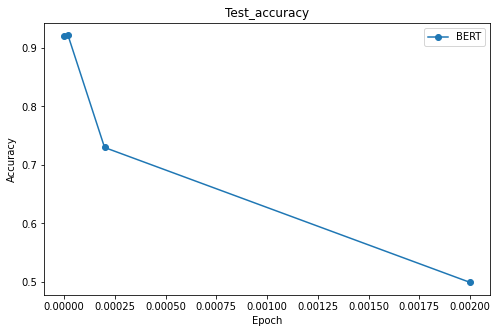

In [13]:

plt.figure(figsize=(8,5))
plt.plot(lr,test_acc, '-o', label='BERT')
plt.title("Test_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.savefig("./output/Bert_acc")
plt.show()

In [49]:
df1=pd.read_csv("./output/Bert1/result.csv")
df2=pd.read_csv("./output/Bert2/result.csv")
df3=pd.read_csv("./output/Bert3/result.csv")
df4=pd.read_csv("./output/Bert4/result.csv")
df1

,epochs_count,train_losses,train_accuracies,valid_losses,valid_accuracies
0,1,0.730880,0.505491,0.704440,0.490826
1,2,0.701882,0.506358,0.745144,0.509174
2,3,0.699646,0.509827,0.734882,0.509174


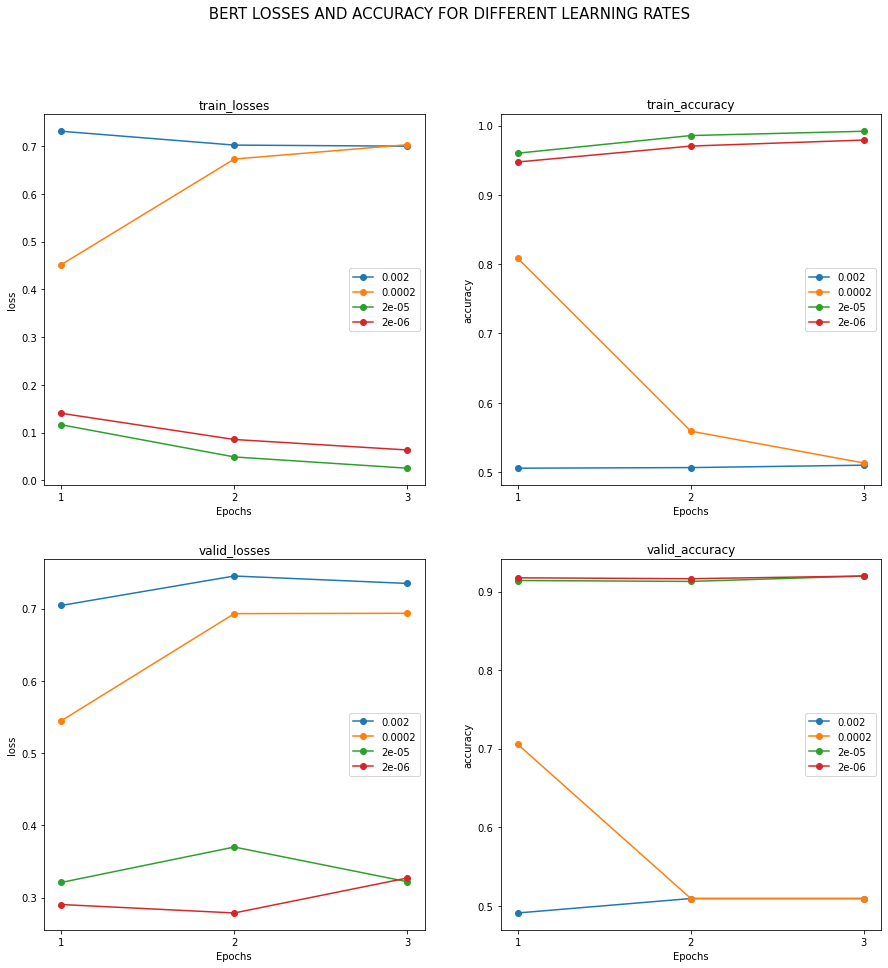

In [53]:
    fig,a =  plt.subplots(2,2,figsize=(15,15))
    fig.suptitle(' BERT LOSSES AND ACCURACY FOR DIFFERENT LEARNING RATES ', fontsize=15)
    a[0][0].plot(df1['epochs_count'],df1['train_losses'],'-o',label=lr[0])
    a[0][0].plot(df2['epochs_count'],df2['train_losses'],'-o',label=lr[1])
    a[0][0].plot(df3['epochs_count'],df3['train_losses'],'-o',label=lr[2])
    a[0][0].plot(df4['epochs_count'],df4['train_losses'],'-o',label=lr[3])
    a[0][0].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[0][0].set_title('train_losses')
    a[0][0].set_xlabel("Epochs")
    a[0][0].set_ylabel("loss")
    a[0][0].legend()

    a[0][1].plot(df1['epochs_count'],df1['train_accuracies'],'-o',label=lr[0])
    a[0][1].plot(df2['epochs_count'],df2['train_accuracies'],'-o',label=lr[1])
    a[0][1].plot(df3['epochs_count'],df3['train_accuracies'],'-o',label=lr[2])
    a[0][1].plot(df4['epochs_count'],df4['train_accuracies'],'-o',label=lr[3])
    a[0][1].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[0][1].set_title('train_accuracy')
    a[0][1].set_xlabel("Epochs")
    a[0][1].set_ylabel("accuracy")
    a[0][1].legend()

    a[1][0].plot(df1['epochs_count'],df1['valid_losses'],'-o',label=lr[0])
    a[1][0].plot(df2['epochs_count'],df2['valid_losses'],'-o',label=lr[1])
    a[1][0].plot(df3['epochs_count'],df3['valid_losses'],'-o',label=lr[2])
    a[1][0].plot(df4['epochs_count'],df4['valid_losses'],'-o',label=lr[3])
    a[1][0].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[1][0].set_title('valid_losses')
    a[1][0].set_xlabel("Epochs")
    a[1][0].set_ylabel("loss")
    a[1][0].legend()
    
    
    a[1][1].plot(df1['epochs_count'],df1['valid_accuracies'],'-o',label=lr[0])
    a[1][1].plot(df2['epochs_count'],df2['valid_accuracies'],'-o',label=lr[1])
    a[1][1].plot(df3['epochs_count'],df3['valid_accuracies'],'-o',label=lr[2])
    a[1][1].plot(df4['epochs_count'],df4['valid_accuracies'],'-o',label=lr[3])
    a[1][1].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[1][1].set_title('valid_accuracy')
    a[1][1].set_xlabel("Epochs")
    a[1][1].set_ylabel("accuracy")
    a[1][1].legend()
    plt.savefig("./output/Bert_losses")
    plt.show()





##BERT (Epochs): 

Train Bert with different epochs and plot epochs=[1,3,5,10] 

In [15]:
from run_Bert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

def runm(epochs,target_dir):
    epochs=epochs
    target_dir=target_dir

    return model_train_validate_test(train_df, dev_df, test_df, target_dir, 
             max_seq_len=50,
             epochs=epochs,
             batch_size=32,
             lr=2e-5,
             patience=1,
             max_grad_norm=10.0,
             if_save_model=True,
             checkpoint=None)


In [54]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline 

epochs=[1,3,5,10]

target_dire1 = "./output/Berte1/"
target_dire2 = "./output/Berte2/"
target_dire3 = "./output/Berte3/"
target_dire4 = "./output/Berte4/"

In [ ]:
#Train models with different learning rates

epochs_count1, train_losses1, train_accuracies1, valid_losses1, valid_accuracies1 =runm(epochs[0],target_dire1)
epochs_count2, train_losses2, train_accuracies2, valid_losses2, valid_accuracies2 =runm(epochs[1],target_dire2)
epochs_count3, train_losses3, train_accuracies3, valid_losses3, valid_accuracies3 =runm(epochs[2],target_dire3)
epochs_count4, train_losses4, train_accuracies4, valid_losses4, valid_accuracies4 =runm(epochs[3],target_dire4)


In [ ]:
result1=pd.DataFrame(list(zip(epochs_count1, train_losses1, train_accuracies1, valid_losses1, valid_accuracies1)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result1.to_csv(os.path.join(target_dire1,"result.csv"), index=False)


result2=pd.DataFrame(list(zip(epochs_count2, train_losses2, train_accuracies2, valid_losses2, valid_accuracies2)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result2.to_csv(os.path.join(target_dire2,"result.csv"), index=False)


result3=pd.DataFrame(list(zip(epochs_count3, train_losses3, train_accuracies3, valid_losses3, valid_accuracies3)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result3.to_csv(os.path.join(target_dire3,"result.csv"), index=False)


result4=pd.DataFrame(list(zip(epochs_count4, train_losses4, train_accuracies, valid_losses4, valid_accuracies4)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result4.to_csv(os.path.join(target_dire4,"result.csv"), index=False)

In [21]:
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report
) 


test_acc=[]

test_result1 = pd.read_csv(os.path.join(target_dire1, 'test_prediction.csv'))
test_result2 = pd.read_csv(os.path.join(target_dire2, 'test_prediction.csv'))
test_result3 = pd.read_csv(os.path.join(target_dire3, 'test_prediction.csv'))
test_result4 = pd.read_csv(os.path.join(target_dire4, 'test_prediction.csv'))

test_acc.append(accuracy_score(test_df.similarity, test_result1.prediction))
test_acc.append(accuracy_score(test_df.similarity, test_result2.prediction))
test_acc.append(accuracy_score(test_df.similarity, test_result3.prediction))
test_acc.append(accuracy_score(test_df.similarity, test_result4.prediction))

print(test_acc)

[0.9231191652937946, 0.9297089511257551, 0.9225700164744646, 0.9253157605711148]


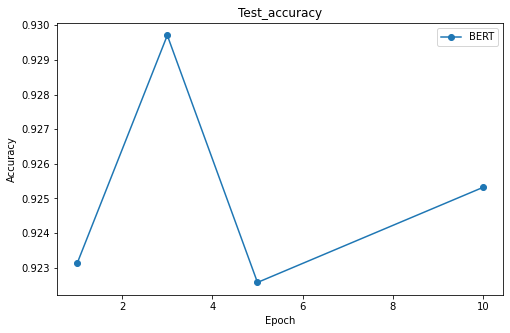

In [22]:
plt.figure(figsize=(8,5))
plt.plot(epochs,test_acc, '-o', label='BERT')
plt.title("Test_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.savefig("./output/Bert_test_epoch")
plt.show()

## ROBERTA 

Trained Roberta with different batch sizes=[8,32,48,256] 

In [17]:
from run_Roberta_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

def runm(batch_size,target_dir):
    batch_size=batch_size
    target_dir=target_dir

    return model_train_validate_test(train_df, dev_df, test_df, target_dir, 
             max_seq_len=50,
             epochs=3,
             batch_size=batch_size,
             lr=2e-5,
             patience=1,
             max_grad_norm=10.0,
             if_save_model=True,
             checkpoint=None)


In [56]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline 

batch_size=[8,32,48,256]

target_dir1 = "./output/Roberta8/"
target_dir2 = "./output/Roberta32/"
target_dir3 = "./output/Roberta48/"
target_dir4 = "./output/Roberta256/"

In [ ]:
#Train models with different Bbatch sizes

epochs_count1, train_losses1, train_accuracies1, valid_losses1, valid_accuracies1 =runm(batch_size[0],target_dir1)
epochs_count2, train_losses2, train_accuracies2, valid_losses2, valid_accuracies2 =runm(batch_size[1],target_dir2)
epochs_count3, train_losses3, train_accuracies3, valid_losses3, valid_accuracies3 =runm(batch_size[2],target_dir3)
epochs_count4, train_losses4, train_accuracies4, valid_losses4, valid_accuracies4 =runm(batch_size[3],target_dir4)

In [ ]:
result1=pd.DataFrame(list(zip(epochs_count1, train_losses1, train_accuracies1, valid_losses1, valid_accuracies1)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result1.to_csv(os.path.join(target_dir1,"result.csv"), index=False)


result2=pd.DataFrame(list(zip(epochs_count2, train_losses2, train_accuracies2, valid_losses2, valid_accuracies2)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result2.to_csv(os.path.join(target_dir2,"result.csv"), index=False)


result3=pd.DataFrame(list(zip(epochs_count3, train_losses3, train_accuracies3, valid_losses3, valid_accuracies3)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result3.to_csv(os.path.join(target_dir3,"result.csv"), index=False)


result4=pd.DataFrame(list(zip(epochs_count4, train_losses4, train_accuracies, valid_losses4, valid_accuracies4)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result4.to_csv(os.path.join(target_dir4,"result.csv"), index=False)

In [24]:
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report
) 


test_acc=[]

test_result1 = pd.read_csv(os.path.join(target_dir1, 'test_prediction.csv'))
test_result2 = pd.read_csv(os.path.join(target_dir2, 'test_prediction.csv'))
test_result3 = pd.read_csv(os.path.join(target_dir3, 'test_prediction.csv'))
test_result4 = pd.read_csv(os.path.join(target_dir4, 'test_prediction.csv'))

test_acc.append(accuracy_score(test_df.similarity, test_result1.prediction))
test_acc.append(accuracy_score(test_df.similarity, test_result2.prediction))
test_acc.append(accuracy_score(test_df.similarity, test_result3.prediction))
test_acc.append(accuracy_score(test_df.similarity, test_result4.prediction))

print(test_acc)

[0.9187259747391543, 0.9362987369577156, 0.942339373970346, 0.9346512904997254]


8


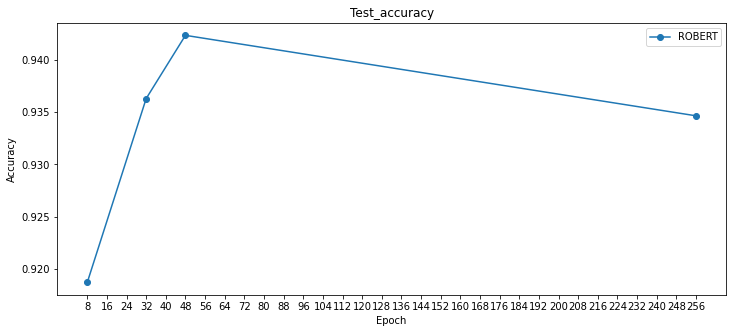

In [34]:
import numpy as np
plt.figure(figsize=(12,5))
plt.plot(batch_size,test_acc, '-o', label='ROBERT')
plt.title("Test_accuracy")
print(np.min(batch_size))
plt.xticks(np.arange(np.min(batch_size), np.max(batch_size)+8,8))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.savefig("./output/RoBert_test_epoch")
plt.show()

In [68]:
df1=pd.read_csv("./output/Roberta8/result.csv")
df2=pd.read_csv("./output/Roberta32/result.csv")
df3=pd.read_csv("./output/Roberta48/result.csv")
df4=pd.read_csv("./output/Roberta256/result.csv")
df1

,epochs_count,train_losses,train_accuracies,valid_losses,valid_accuracies
0,1,0.380214,0.841329,0.282565,0.905963
1,2,0.210216,0.931647,0.302536,0.909404
2,3,0.121800,0.963728,0.293675,0.923165


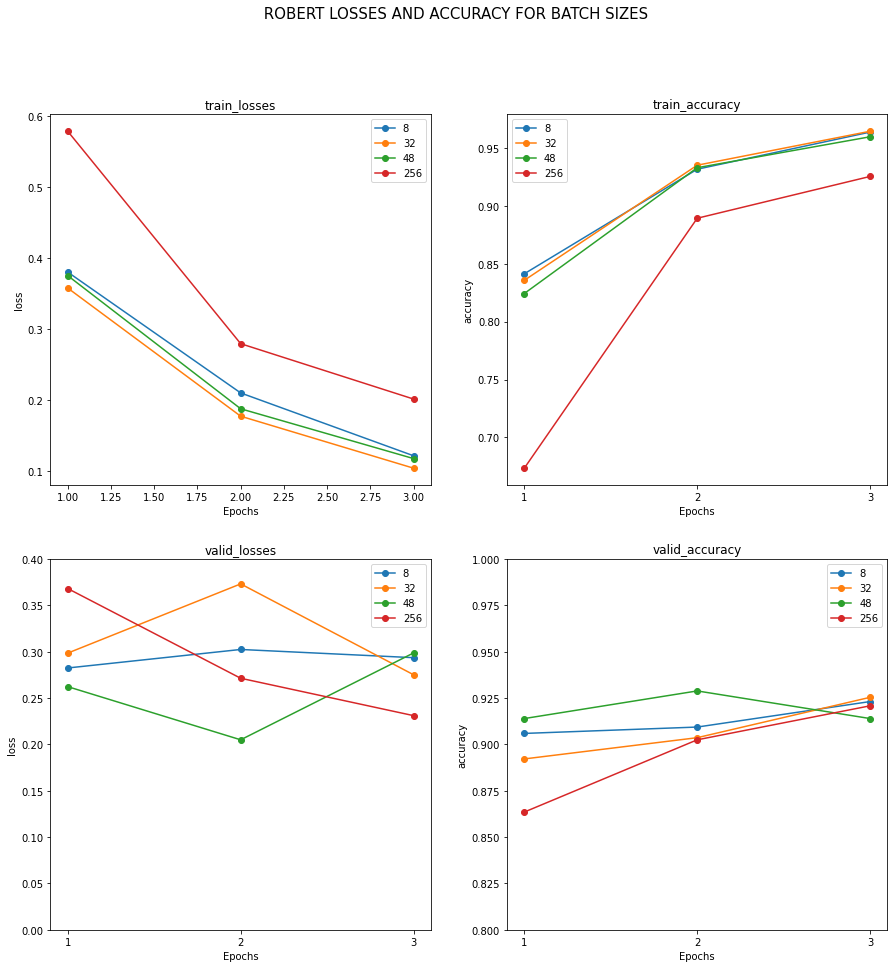

In [69]:
    fig,a =  plt.subplots(2,2,figsize=(15,15))
    fig.suptitle(' ROBERT LOSSES AND ACCURACY FOR BATCH SIZES ', fontsize=15)
    a[0][0].plot(df1['epochs_count'],df1['train_losses'],'-o',label=batch_size[0])
    a[0][0].plot(df2['epochs_count'],df2['train_losses'],'-o',label=batch_size[1])
    a[0][0].plot(df3['epochs_count'],df3['train_losses'],'-o',label=batch_size[2])
    a[0][0].plot(df4['epochs_count'],df4['train_losses'],'-o',label=batch_size[3])
    a[0][1].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[0][0].set_title('train_losses')
    a[0][0].set_xlabel("Epochs")
    a[0][0].set_ylabel("loss")
    a[0][0].legend()

    a[0][1].plot(df1['epochs_count'],df1['train_accuracies'],'-o',label=batch_size[0])
    a[0][1].plot(df2['epochs_count'],df2['train_accuracies'],'-o',label=batch_size[1])
    a[0][1].plot(df3['epochs_count'],df3['train_accuracies'],'-o',label=batch_size[2])
    a[0][1].plot(df4['epochs_count'],df4['train_accuracies'],'-o',label=batch_size[3])
    a[0][1].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[0][1].set_title('train_accuracy')
    a[0][1].set_xlabel("Epochs")
    a[0][1].set_ylabel("accuracy")
    a[0][1].legend()

    a[1][0].plot(df1['epochs_count'],df1['valid_losses'],'-o',label=batch_size[0])
    a[1][0].plot(df2['epochs_count'],df2['valid_losses'],'-o',label=batch_size[1])
    a[1][0].plot(df3['epochs_count'],df3['valid_losses'],'-o',label=batch_size[2])
    a[1][0].plot(df4['epochs_count'],df4['valid_losses'],'-o',label=batch_size[3])
    a[1][0].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[1][0].set_ylim(bottom=0.00, top=0.40)
    a[1][0].set_title('valid_losses')
    a[1][0].set_xlabel("Epochs")
    a[1][0].set_ylabel("loss")
    a[1][0].legend()
    
    
    a[1][1].plot(df1['epochs_count'],df1['valid_accuracies'],'-o',label=batch_size[0])
    a[1][1].plot(df2['epochs_count'],df2['valid_accuracies'],'-o',label=batch_size[1])
    a[1][1].plot(df3['epochs_count'],df3['valid_accuracies'],'-o',label=batch_size[2])
    a[1][1].plot(df4['epochs_count'],df4['valid_accuracies'],'-o',label=batch_size[3])
    a[1][1].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[1][1].set_title('valid_accuracy')
    a[1][1].set_ylim(bottom=0.8, top=1.0)
    a[1][1].set_xlabel("Epochs")
    a[1][1].set_ylabel("accuracy")
    a[1][1].legend()
    plt.savefig("./output/roBert_losses")
    plt.show()


##XLNET

Trained Xlnet with different Maximum sequence length=[10,50,100]

In [18]:
from run_Xlnet_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

def runm(max_seq_len,target_dir):
    max_seq_len=max_seq_len
    target_dir=target_dir

    return model_train_validate_test(train_df, dev_df, test_df, target_dir, 
             max_seq_len=max_seq_len,
             epochs=3,
             batch_size=32,
             lr=2e-5,
             patience=1,
             max_grad_norm=10.0,
             if_save_model=True,
             checkpoint=None)


In [59]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline 

max_seq_len=[50,100,10]

target_dir1 = "./output/Xlnet50/"
target_dir2 = "./output/Xlnet100/"
target_dir3 = "./output/Xlnet10/"

In [ ]:
#Train models with different maximum sequence length

epochs_count1, train_losses1, train_accuracies1, valid_losses1, valid_accuracies1 =runm(max_seq_len[0],target_dir1)
epochs_count2, train_losses2, train_accuracies2, valid_losses2, valid_accuracies2 =runm(max_seq_len[1],target_dir2)
epochs_count3, train_losses3, train_accuracies3, valid_losses3, valid_accuracies3 =runm(max_seq_len[2],target_dir3)


In [ ]:
result1=pd.DataFrame(list(zip(epochs_count1, train_losses1, train_accuracies1, valid_losses1, valid_accuracies1)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result1.to_csv(os.path.join(target_dir1,"result.csv"), index=False)


result2=pd.DataFrame(list(zip(epochs_count2, train_losses2, train_accuracies2, valid_losses2, valid_accuracies2)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result2.to_csv(os.path.join(target_dir2,"result.csv"), index=False)


result3=pd.DataFrame(list(zip(epochs_count3, train_losses3, train_accuracies3, valid_losses3, valid_accuracies3)),
                    columns=['epochs_count', 'train_losses', 'train_accuracies', 'valid_losses', 'valid_accuracies'])

result3.to_csv(os.path.join(target_dir3,"result.csv"), index=False)




In [67]:
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report
) 


test_acc=[]
max_seq_lenp=[10,50,100]

test_result1 = pd.read_csv(os.path.join(target_dir1, 'test_prediction.csv'))
test_result2 = pd.read_csv(os.path.join(target_dir2, 'test_prediction.csv'))
test_result3 = pd.read_csv(os.path.join(target_dir3, 'test_prediction.csv'))

test_acc.append(accuracy_score(test_df.similarity, test_result3.prediction)) #10
test_acc.append(accuracy_score(test_df.similarity, test_result1.prediction)) #50
test_acc.append(accuracy_score(test_df.similarity, test_result2.prediction))  #100




print(test_acc)

[0.771554091158704, 0.9500274574409665, 0.956068094453597]


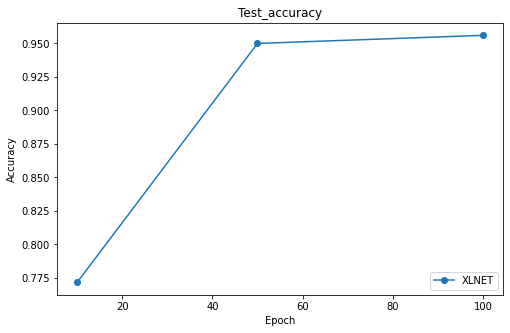

In [68]:
import numpy as np
plt.figure(figsize=(8,5))
plt.plot(max_seq_lenp,test_acc, '-o', label='XLNET')
plt.title("Test_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
#plt.savefig("./output/Xlnet_testacc")
plt.show()

In [70]:
df1=pd.read_csv("./output/Xlnet50/result.csv")
df2=pd.read_csv("./output/Xlnet100/result.csv")
df3=pd.read_csv("./output/Xlnet10/result.csv")
df1

,epochs_count,train_losses,train_accuracies,valid_losses,valid_accuracies
0,1,0.405893,0.802457,0.209130,0.927752
1,2,0.187015,0.935549,0.182103,0.938073
2,3,0.105066,0.967630,0.209653,0.944954


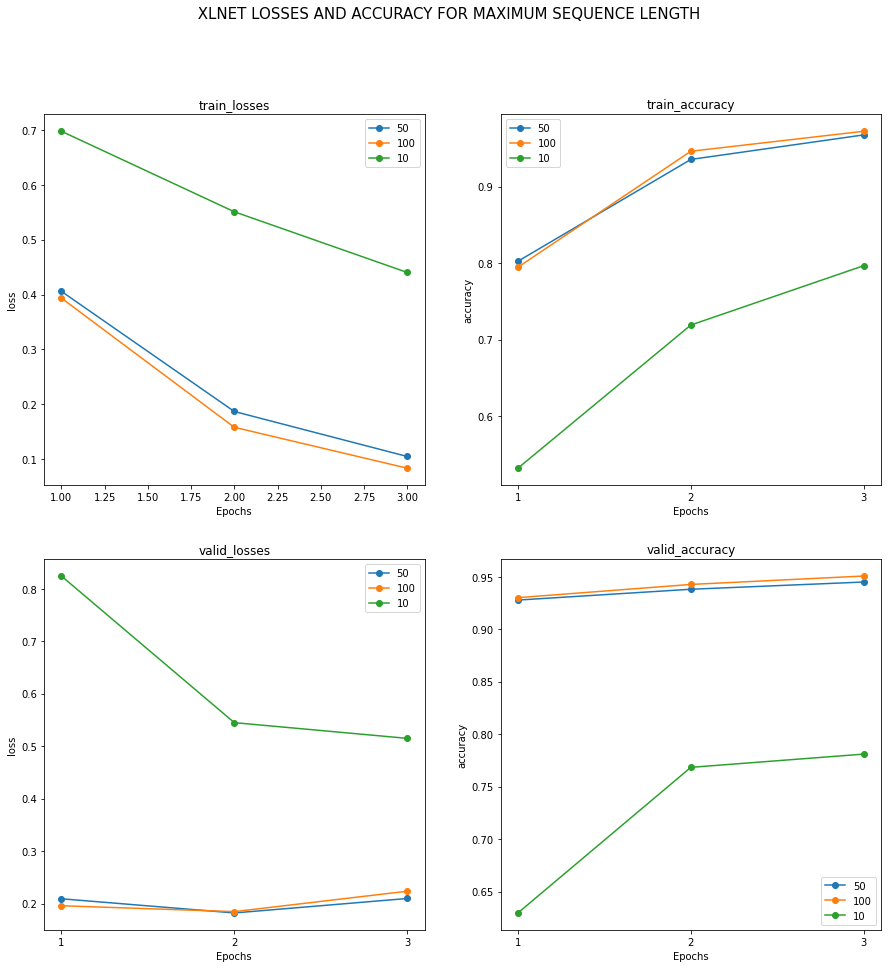

In [71]:
    fig,a =  plt.subplots(2,2,figsize=(15,15))
    fig.suptitle(' XLNET LOSSES AND ACCURACY FOR MAXIMUM SEQUENCE LENGTH ', fontsize=15)
    a[0][0].plot(df1['epochs_count'],df1['train_losses'],'-o',label=max_seq_len[0])
    a[0][0].plot(df2['epochs_count'],df2['train_losses'],'-o',label=max_seq_len[1])
    a[0][0].plot(df3['epochs_count'],df3['train_losses'],'-o',label=max_seq_len[2])
    a[0][1].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[0][0].set_title('train_losses')
    a[0][0].set_xlabel("Epochs")
    a[0][0].set_ylabel("loss")
    a[0][0].legend()

    a[0][1].plot(df1['epochs_count'],df1['train_accuracies'],'-o',label=max_seq_len[0])
    a[0][1].plot(df2['epochs_count'],df2['train_accuracies'],'-o',label=max_seq_len[1])
    a[0][1].plot(df3['epochs_count'],df3['train_accuracies'],'-o',label=max_seq_len[2])
    a[0][1].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[0][1].set_title('train_accuracy')
    a[0][1].set_xlabel("Epochs")
    a[0][1].set_ylabel("accuracy")
    a[0][1].legend()

    a[1][0].plot(df1['epochs_count'],df1['valid_losses'],'-o',label=max_seq_len[0])
    a[1][0].plot(df2['epochs_count'],df2['valid_losses'],'-o',label=max_seq_len[1])
    a[1][0].plot(df3['epochs_count'],df3['valid_losses'],'-o',label=max_seq_len[2])
    a[1][0].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[1][0].set_title('valid_losses')
    a[1][0].set_xlabel("Epochs")
    a[1][0].set_ylabel("loss")
    a[1][0].legend()
    
    
    a[1][1].plot(df1['epochs_count'],df1['valid_accuracies'],'-o',label=max_seq_len[0])
    a[1][1].plot(df2['epochs_count'],df2['valid_accuracies'],'-o',label=max_seq_len[1])
    a[1][1].plot(df3['epochs_count'],df3['valid_accuracies'],'-o',label=max_seq_len[2])
    a[1][1].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[1][1].set_title('valid_accuracy')
    a[1][1].set_xlabel("Epochs")
    a[1][1].set_ylabel("accuracy")
    a[1][1].legend()
    plt.savefig("./output/Xlnet_losses")
    plt.show()

## Plotting 3 model results for default parameters (Q1)

In [22]:
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report
) 


import torch
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

test_acc=[]

target_dir1 = "./output/Bert3/"
target_dir2 = "./output/Roberta32/"
target_dir3 = "./output/Xlnet50/"


test_result1 = pd.read_csv(os.path.join(target_dir1, 'test_prediction.csv'))
test_result2 = pd.read_csv(os.path.join(target_dir2, 'test_prediction.csv'))
test_result3 = pd.read_csv(os.path.join(target_dir3, 'test_prediction.csv'))

test_acc.append(accuracy_score(test_df.similarity, test_result1.prediction)) 
test_acc.append(accuracy_score(test_df.similarity, test_result2.prediction)) 
test_acc.append(accuracy_score(test_df.similarity, test_result3.prediction))  


print("Test Accuracy for Bert model is :",test_acc[0]) 
print("Test Accuracy for Roberta model is :",test_acc[1]) 
print("Test Accuracy for XLnet model is :",test_acc[2]) 



Test Accuracy for Bert model is : 0.9214717188358045
Test Accuracy for Roberta model is : 0.9362987369577156
Test Accuracy for XLnet model is : 0.9500274574409665


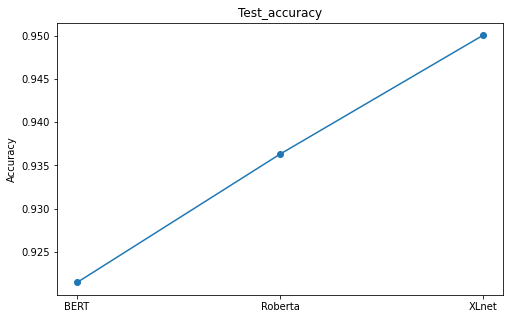

In [109]:
import numpy as np
plt.figure(figsize=(8,5))
plt.plot(['BERT','Roberta','XLnet'],test_acc, '-o', label='XLNET')
plt.title("Test_accuracy")
plt.ylabel("Accuracy")
plt.savefig("./output/ 3models_testacc")
plt.show()

In [72]:
df1=pd.read_csv("./output/Bert3/result.csv")
df2=pd.read_csv("./output/Roberta32/result.csv")
df3=pd.read_csv("./output/Xlnet50/result.csv")
df3


,epochs_count,train_losses,train_accuracies,valid_losses,valid_accuracies
0,1,0.405893,0.802457,0.209130,0.927752
1,2,0.187015,0.935549,0.182103,0.938073
2,3,0.105066,0.967630,0.209653,0.944954


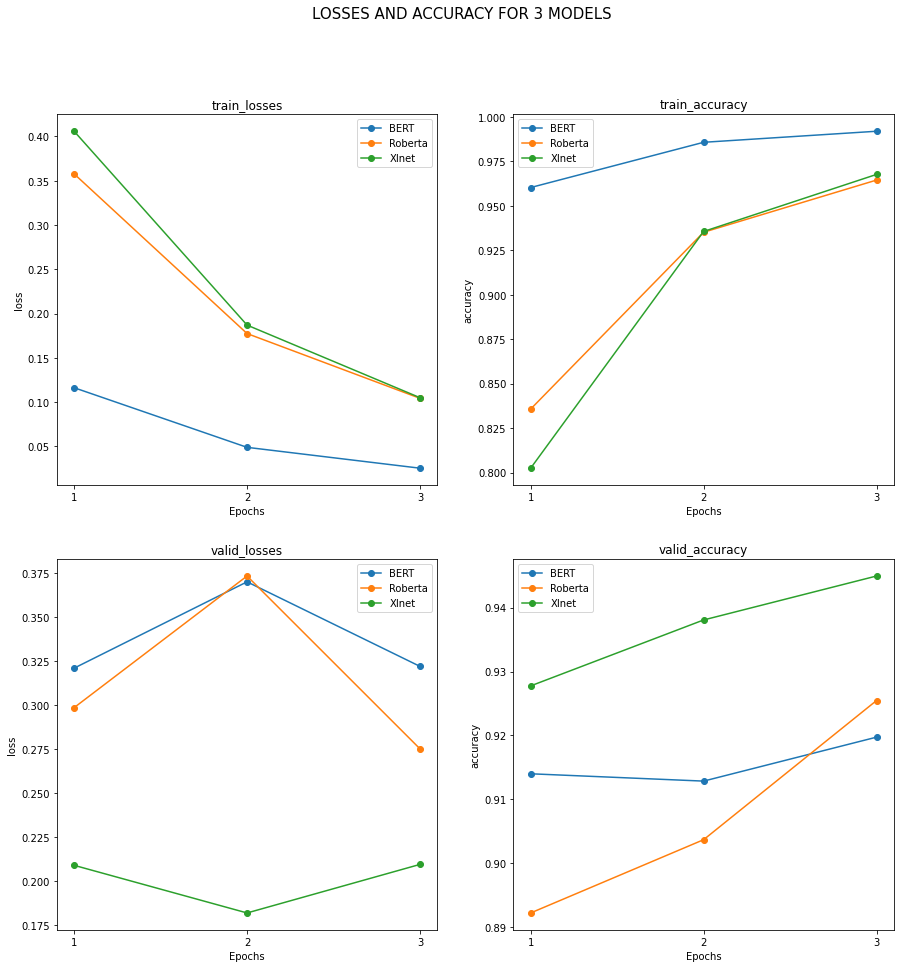

In [73]:
    from matplotlib.ticker import MaxNLocator
    
    fig,a =  plt.subplots(2,2,figsize=(15,15))
    fig.suptitle('LOSSES AND ACCURACY FOR 3 MODELS', fontsize=15)
    a[0][0].plot(df1['epochs_count'],df1['train_losses'],'-o', label='BERT')
    a[0][0].plot(df2['epochs_count'],df2['train_losses'],'-o', label='Roberta')
    a[0][0].plot(df3['epochs_count'],df3['train_losses'],'-o', label='Xlnet')
    a[0][0].set_title('train_losses')
    a[0][0].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[0][0].set_xlabel("Epochs")
    a[0][0].set_ylabel("loss")
    a[0][0].legend()

    a[0][1].plot(df1['epochs_count'],df1['train_accuracies'],'-o', label='BERT')
    a[0][1].plot(df2['epochs_count'],df2['train_accuracies'],'-o', label='Roberta')
    a[0][1].plot(df3['epochs_count'],df3['train_accuracies'],'-o', label='Xlnet')
    a[0][1].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[0][1].set_title('train_accuracy')
    a[0][1].set_xlabel("Epochs")
    a[0][1].set_ylabel("accuracy")
    a[0][1].legend()

    a[1][0].plot(df1['epochs_count'],df1['valid_losses'],'-o', label='BERT')
    a[1][0].plot(df2['epochs_count'],df2['valid_losses'],'-o', label='Roberta')
    a[1][0].plot(df3['epochs_count'],df3['valid_losses'],'-o', label='Xlnet')
    a[1][0].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[1][0].set_title('valid_losses')
    a[1][0].set_xlabel("Epochs")
    a[1][0].set_ylabel("loss")
    a[1][0].legend()
    
    
    a[1][1].plot(df1['epochs_count'],df1['valid_accuracies'],'-o', label='BERT')
    a[1][1].plot(df2['epochs_count'],df2['valid_accuracies'],'-o', label='Roberta')
    a[1][1].plot(df3['epochs_count'],df3['valid_accuracies'],'-o', label='Xlnet')
    a[1][1].xaxis.set_major_locator(MaxNLocator(integer=True))
    a[1][1].set_title('valid_accuracy')
    a[1][1].set_xlabel("Epochs")
    a[1][1].set_ylabel("accuracy")
    a[1][1].legend()
    plt.savefig("./output/3models_losses")
    plt.show()

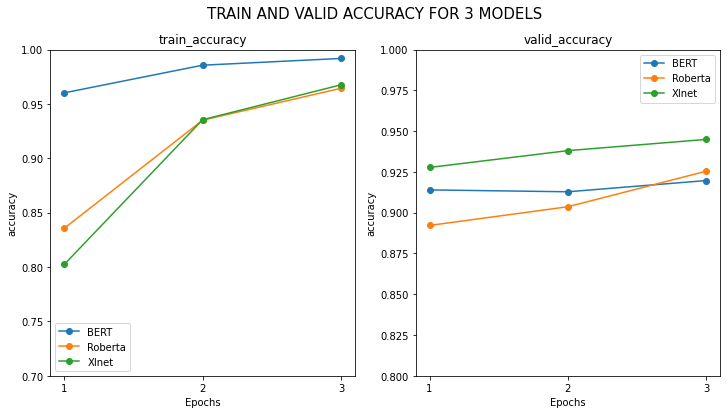

In [48]:
    fig,(ax1, ax2) =  plt.subplots(1,2,figsize=(12,6))


    fig.suptitle('TRAIN AND VALID ACCURACY FOR 3 MODELS', fontsize=15)

    ax1.plot(df1['epochs_count'],df1['train_accuracies'],'-o', label='BERT')
    ax1.plot(df2['epochs_count'],df2['train_accuracies'],'-o', label='Roberta')
    ax1.plot(df3['epochs_count'],df3['train_accuracies'],'-o', label='Xlnet')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.set_ylim(bottom=0.7, top=1.0)
    ax1.set_title('train_accuracy')
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("accuracy")
    ax1.legend()


    
    ax2.plot(df1['epochs_count'],df1['valid_accuracies'],'-o', label='BERT')
    ax2.plot(df2['epochs_count'],df2['valid_accuracies'],'-o', label='Roberta')
    ax2.plot(df3['epochs_count'],df3['valid_accuracies'],'-o', label='Xlnet')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.set_ylim(bottom=0.8, top=1.0)
    ax2.set_title('valid_accuracy')
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("accuracy")
    ax2.legend()
    plt.savefig("./output/3models_losses1")
    plt.show()